<h1 style="color:blue;">Outline of Scenario 10 notebook:</h1> 

- C1.S10.Py01 – Combine “other” and “none” and run regression
- C1.S10.Py02 - Create interaction and re-run regression
- C1.S10.Py03 - Remove outliers and re-run regression



In [2]:
#Code Block 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#style options 

%matplotlib inline  
#if you want graphs to automatically without plt.show

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

plt.style.use('seaborn-v0_8') #a style that can be used for plots - see style reference above



In [3]:
#Code Block 2
df = pd.read_csv('data/Scenario10.csv', index_col = 0, header=0) 
    #DOES set the first column to the index
    # and the top row as the headers

In [4]:
#Code Block 3
df.head(3)

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019,0.081522,2.889228,0.149279,0.069772,0,0
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018,0.092593,1.411130,0.100933,0.043083,0,0
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528,1,72000


<h2 style="color:blue;">Combine “OTHER” and “NONE” and run regression</h2>



<h3 style="color:blue;">Rename Revolving Accounts </h3>

- Revolving Accounts is the amount of debt balance for revolving debt types (ex. credit cards)
- Total Revolving Credit Line is the credit limit on the revolving credit line (ex. max amount for a credit card)

#### Let's change Revolving Accounts to Revolving Balance

In [7]:
#Code Block 4
df.columns

Index(['Member ID', 'Loan ID', 'Origination Date', 'Interest Rate',
       'Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Accounts',
       'Total Revolving Credit Line', 'Term', 'Grade', 'Employee Title',
       'Length of Employment', 'Home Ownership', 'Loan Purpose',
       'Zip Code of Residence', 'State of Residence',
       'Delinquencies Past 24 Months', 'Credit Inquires Last 6 Months',
       'Open Accounts', 'TermNum', 'TermString', 'Day', 'Month', 'Year',
       'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
       'Income Verification', 'IncVer_Income_act'],
      dtype='object')

In [8]:
#Code Block 5
df = df.rename(columns = {'Revolving Accounts': "Revolving Balance"})

#### NOTE: single quotes ' ' is the same as double quotes " " 

In [10]:
#Code Block 6
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      30071 non-null  int64  
 1   Loan ID                        30071 non-null  int64  
 2   Origination Date               30071 non-null  object 
 3   Interest Rate                  30071 non-null  float64
 4   Amount Funded                  30071 non-null  int64  
 5   Total Debt                     30071 non-null  float64
 6   Annual Income                  30071 non-null  int64  
 7   Revolving Balance              30071 non-null  float64
 8   Total Revolving Credit Line    30071 non-null  float64
 9   Term                           30071 non-null  int64  
 10  Grade                          30071 non-null  object 
 11  Employee Title                 28396 non-null  object 
 12  Length of Employment           28990 non-null  floa

In [11]:
#Code Block 7
df['Home Ownership'].value_counts(dropna=False)

Home Ownership
MORTGAGE    15484
RENT        12212
OWN          2303
OTHER          72
Name: count, dtype: int64

<h3 style="color:blue;">Combine "other" and "rent" by using .replace </h3>

In [13]:
#Code Block 8
df = df.replace({"NONE":"OTHER"})
df['Home Ownership'].value_counts(dropna=False)

Home Ownership
MORTGAGE    15484
RENT        12212
OWN          2303
OTHER          72
Name: count, dtype: int64

<h3 style="color:blue;">Create dummy variables for Home Ownership </h3>

- Create the dummy variables *(ex. MORTGAGE, RENT, OWN, OTHER)*
- Concatenate with the original DataFrame *(ex. dummies_HomeOwnership with df_reg)*
- Drop the original variable that was used to create the dummy variables *(ex. Home Ownership)*

In [15]:
#Code Block 9
dummies_HomeOwnership = pd.get_dummies(df['Home Ownership'], drop_first = False)
df = pd.concat([df, dummies_HomeOwnership], axis = 1)
#df = df.drop(['Home Ownership'], axis = 1)
df.head()

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,MORTGAGE,OTHER,OWN,RENT
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019,0.081522,2.889228,0.149279,0.069772,0,0,True,False,False,False
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018,0.092593,1.411130,0.100933,0.043083,0,0,True,False,False,False
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528,1,72000,True,False,False,False
7,771211,888522,11/20/19,21.49,35000,354982.0,114000,38651.0,79800.0,60,E,Nevada Gaming Control Board,7.0,MORTGAGE,credit_card,891xx,NV,1.0,1,19,61,60 months,2,11,2019,0.307018,3.113877,0.484348,0.339044,1,114000,True,False,False,False
9,780866,812348,4/24/19,11.14,3600,175788.0,65000,12936.0,39400.0,36,B,City of Ithaca,3.0,MORTGAGE,car,488xx,MI,NaN,0,22,37,36 months,2,4,2019,0.055385,2.704431,0.328325,0.199015,0,0,True,False,False,False


In [16]:
#Code Block 10
print('---------------------------------------------------')
print(df['MORTGAGE'].value_counts(dropna=False))
print('---------------------------------------------------')
print(df['OWN'].value_counts(dropna=False))
print('---------------------------------------------------')
print(df['RENT'].value_counts(dropna=False))
print('---------------------------------------------------')
print(df['OTHER'].value_counts(dropna=False))
print('---------------------------------------------------')

---------------------------------------------------
MORTGAGE
True     15484
False    14587
Name: count, dtype: int64
---------------------------------------------------
OWN
False    27768
True      2303
Name: count, dtype: int64
---------------------------------------------------
RENT
False    17859
True     12212
Name: count, dtype: int64
---------------------------------------------------
OTHER
False    29999
True        72
Name: count, dtype: int64
---------------------------------------------------


In [17]:
#Code Block 11
df_reg = df.copy()

<h3 style="color:blue;">Create a regression model to include Home Ownership</h3>

- Not including MORTGAGE due to its likelihood of multi-colinearity
- If OWN, RENT, and OTHER are 0's, then it can be inferred that MORTGAGE is 1.  


In [19]:
#Code Block 12
df_reg.columns

Index(['Member ID', 'Loan ID', 'Origination Date', 'Interest Rate',
       'Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Balance',
       'Total Revolving Credit Line', 'Term', 'Grade', 'Employee Title',
       'Length of Employment', 'Home Ownership', 'Loan Purpose',
       'Zip Code of Residence', 'State of Residence',
       'Delinquencies Past 24 Months', 'Credit Inquires Last 6 Months',
       'Open Accounts', 'TermNum', 'TermString', 'Day', 'Month', 'Year',
       'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
       'Income Verification', 'IncVer_Income_act', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT'],
      dtype='object')

In [20]:
#Code Block 13
df_reg = df_reg[['Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Balance',
                'Total Revolving Credit Line', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
                'Income Verification', 'IncVer_Income_act', 'OWN', 'RENT', 'OTHER','Interest Rate']]
X = df_reg.drop(["Interest Rate"], axis = 1)
y = df_reg[['Interest Rate']]

In [21]:
#Code Block 14
import statsmodels
import statsmodels.api as sm

In [22]:
#Code Block 15
X = sm.add_constant(X) # adding a constant

reg1 = sm.OLS(y, X.astype(float)).fit()

predictions1 = reg1.predict(X) 
resid1 = reg1.resid
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     972.5
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:01:45   Log-Likelihood:                -80059.
No. Observations:               30071   AIC:                         1.601e+05
Df Residuals:                   30056   BIC:                         1.603e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           9.7267      0.130     74.984      0.000       9.472       9.981
Amount Funded                8.311e-05   4.45e-06     18.675      0.000    7.44e-05    9.18e-05
Total Debt                  -1.457e-06   2.79e-07     -5.217      0.000      -2e-06    -9.1e-07
Annual Income               -2.146e-05   1.24e-06    -17.361      0.000   -2.39e-05    -1.9e-05
Revolving Balance            3.709e-05    2.6e-06     14.261      0.000     3.2e-05    4.22e-05
Total Revolving Credit Line  -3.27e-05    1.8e-06    -18.193      0.000   -3.62e-05   -2.92e-05
Loan_Income                     4.9240      0.328     15.024      0.000       4.282       5.566
Debt_Income                    -0.1433      0.025     -5.634      0.000      -0.193      -0.093
RevBal_Line                     6.0671      0.131     46.445      0.000       5.811       6.323
RevBal_Income                  -2.8903      0.189    -15.286      0.000      -3.261      -2.520
Income Verification             0.1416      0.091      1.554      0.120      -0.037       0.320
IncVer_Income_act            2.042e-05    1.2e-06     16.956      0.000    1.81e-05    2.28e-05
OWN                             0.3385      0.083      4.081      0.000       0.176       0.501
RENT                            0.4305      0.054      7.921      0.000       0.324       0.537
OTHER                           1.2700      0.410      3.096      0.002       0.466       2.074
==============================================================================
Omnibus:                      340.582   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.933
Skew:                           0.245   Prob(JB):                     9.27e-75
Kurtosis:                       2.821   Cond. No.                     4.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#Code Block 16

#Create Predictions dataframe
df_predictions1 = pd.DataFrame(predictions1)
df_predictions1=df_predictions1.rename(columns = {0:'Int_Pred1'})

#Create Residuals dataframe
df_resid1 = pd.DataFrame(resid1)
df_resid1=df_resid1.rename(columns = {0:'Resid1'})


#Concat results into one dataframe
df_reg_results = pd.concat([df_reg, df_predictions1, df_resid1], axis=1)

df_reg_results.head()

,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,OWN,RENT,OTHER,Interest Rate,Int_Pred1,Resid1
6,7500,265809.0,92000,6419.0,43000.0,0.081522,2.889228,0.149279,0.069772,0,0,False,False,False,7.62,7.511629,0.108371
8,10000,152402.0,108000,4653.0,46100.0,0.092593,1.411130,0.100933,0.043083,0,0,False,False,False,6.03,7.42452,-1.394520
4,15000,227890.0,72000,11702.0,26300.0,0.208333,3.165139,0.444943,0.162528,1,72000,False,False,False,16.29,13.083685,3.206315
7,35000,354982.0,114000,38651.0,79800.0,0.307018,3.113877,0.484348,0.339044,1,114000,False,False,False,21.49,13.989237,7.500763
9,3600,175788.0,65000,12936.0,39400.0,0.055385,2.704431,0.328325,0.199015,0,0,False,False,False,11.14,8.868124,2.271876


In [24]:
#Code Block 17
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
#Code Block 18
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [34]:
#Code Block 19

corrMatrix = df_reg.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix,3)

,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,OWN,RENT,OTHER,Interest Rate
Amount Funded,1.000,0.298,0.257,0.304,0.325,0.586,0.116,0.104,0.126,0.367,0.336,-0.047,-0.174,0.003,0.242
Total Debt,0.298,1.000,0.417,0.457,0.429,-0.163,0.732,0.071,0.057,0.172,0.394,-0.109,-0.473,-0.008,-0.095
Annual Income,0.257,0.417,1.000,0.311,0.285,-0.207,0.040,0.040,-0.100,0.096,0.910,-0.040,-0.119,-0.006,-0.025
Revolving Balance,0.304,0.457,0.311,1.000,0.848,0.032,0.172,0.241,0.619,0.151,0.317,-0.016,-0.146,0.001,0.006
Total Revolving Credit Line,0.325,0.429,0.285,0.848,1.000,0.031,0.174,-0.135,0.519,0.128,0.278,-0.002,-0.180,-0.005,-0.173
Loan_Income,0.586,-0.163,-0.207,0.032,0.031,1.000,-0.013,0.072,0.326,0.262,-0.052,0.045,0.020,0.012,0.279
Debt_Income,0.116,0.732,0.040,0.172,0.174,-0.013,1.000,0.052,0.137,0.167,0.074,-0.122,-0.554,-0.001,-0.100
RevBal_Line,0.104,0.071,0.040,0.241,-0.135,0.072,0.052,1.000,0.322,0.114,0.072,-0.037,0.003,0.016,0.403
RevBal_Income,0.126,0.057,-0.100,0.619,0.519,0.326,0.137,0.322,1.000,0.147,-0.020,0.046,-0.064,0.011,0.055
Income Verification,0.367,0.172,0.096,0.151,0.128,0.262,0.167,0.114,0.147,1.000,0.445,-0.002,-0.119,-0.003,0.249


<Axes: title={'center': 'Correlation Heat Map'}>

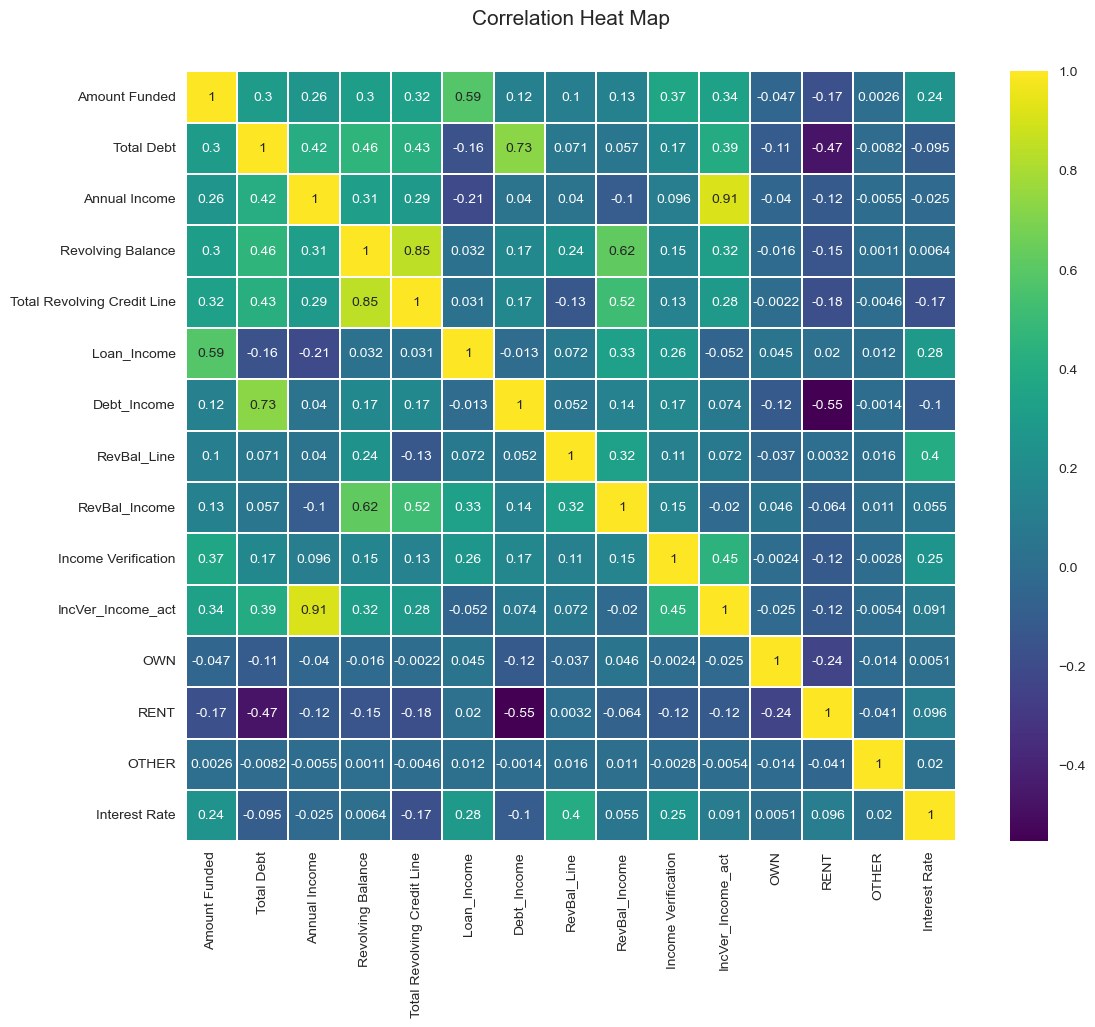

In [36]:
#Code Block 20
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Correlation Heat Map', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

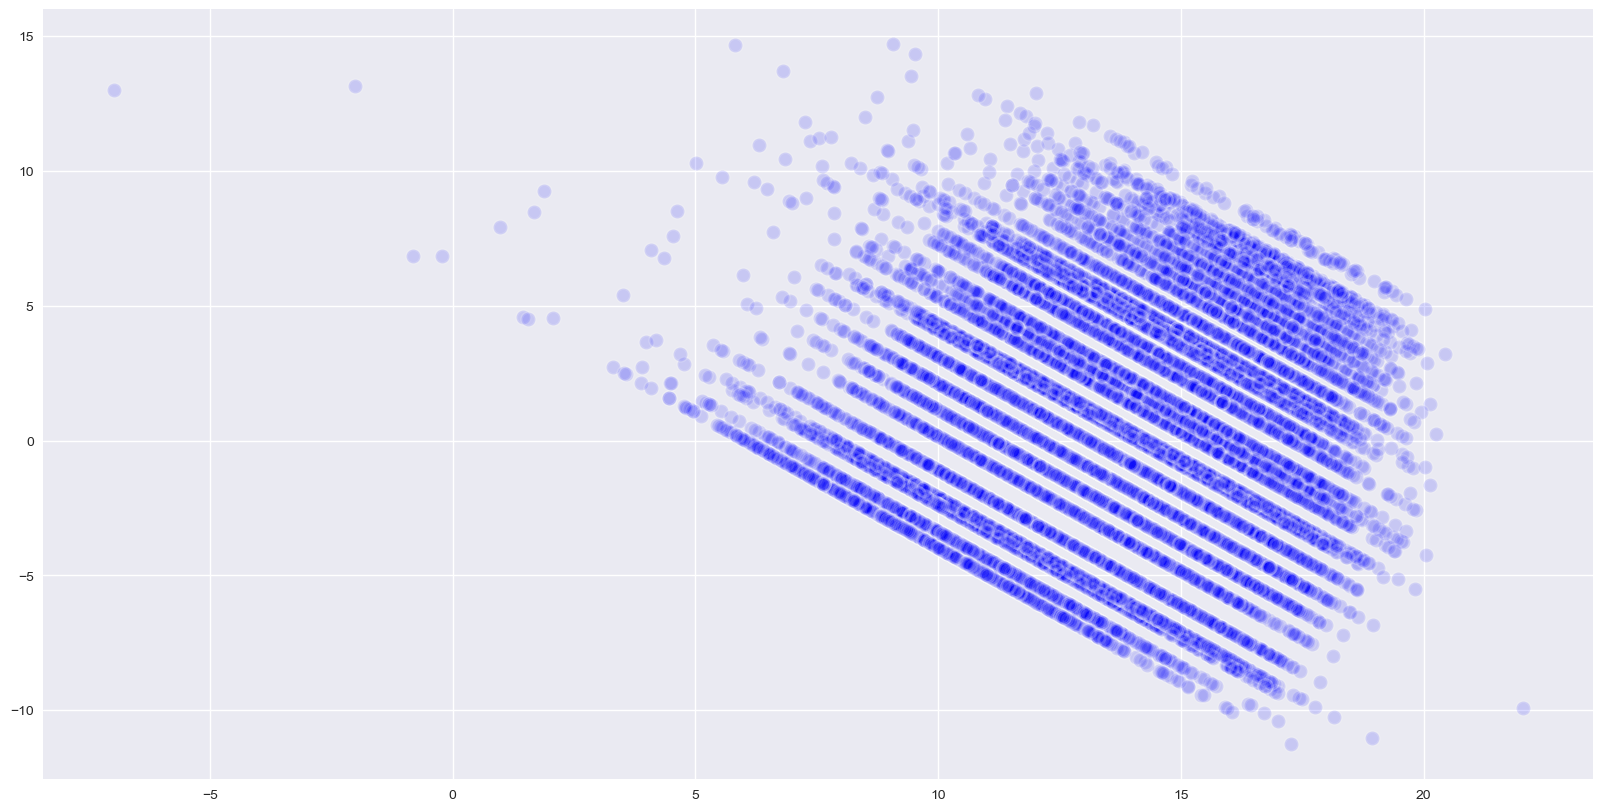

In [38]:
#Code Block 21
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred1', y='Resid1', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})

<h2 style="color:blue;">Create interaction and re-run regression</h2>

- Interaction variable for **OWN** and **Total Revolving Credit Line**

In [41]:
#Code Block 22
df.head()

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,MORTGAGE,OTHER,OWN,RENT
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019,0.081522,2.889228,0.149279,0.069772,0,0,True,False,False,False
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018,0.092593,1.411130,0.100933,0.043083,0,0,True,False,False,False
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528,1,72000,True,False,False,False
7,771211,888522,11/20/19,21.49,35000,354982.0,114000,38651.0,79800.0,60,E,Nevada Gaming Control Board,7.0,MORTGAGE,credit_card,891xx,NV,1.0,1,19,61,60 months,2,11,2019,0.307018,3.113877,0.484348,0.339044,1,114000,True,False,False,False
9,780866,812348,4/24/19,11.14,3600,175788.0,65000,12936.0,39400.0,36,B,City of Ithaca,3.0,MORTGAGE,car,488xx,MI,NaN,0,22,37,36 months,2,4,2019,0.055385,2.704431,0.328325,0.199015,0,0,True,False,False,False


In [43]:
#Code Block 23
df['Own_RevLine_act'] = df['Total Revolving Credit Line'] * df['OWN']

In [45]:
#Code Block 24
df.tail()

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,MORTGAGE,OTHER,OWN,RENT,Own_RevLine_act
30052,4068577,667012,6/13/18,12.12,16800,26895.0,52000,22755.0,27190.0,36,B,Gordon State College,10.0,RENT,credit_card,302xx,GA,NaN,0,6,37,36 months,2,6,2018,0.323077,0.517212,0.836889,0.437596,0,0,False,False,False,True,0.0
30056,4068593,847083,8/11/19,16.29,21350,17488.0,74500,17488.0,28000.0,60,C,Align Communications Inc.,8.0,RENT,credit_card,104xx,NY,NaN,0,8,61,60 months,6,8,2019,0.286577,0.234738,0.624571,0.234738,1,74500,False,False,False,True,0.0
30059,4068611,651653,4/22/18,19.05,3000,44382.0,53000,339.0,1600.0,36,D,Stanford University,1.0,RENT,other,940xx,CA,1.0,1,6,37,36 months,6,4,2018,0.056604,0.837396,0.211875,0.006396,1,53000,False,False,False,True,0.0
30064,4068726,640807,4/1/18,11.14,8975,95440.0,41000,7849.0,14700.0,36,B,Non-profit,5.0,RENT,debt_consolidation,021xx,MA,NaN,0,12,37,36 months,6,4,2018,0.218902,2.327805,0.533946,0.191439,1,41000,False,False,False,True,0.0
30067,4068801,688645,8/20/18,13.11,14400,58904.0,81000,32651.0,40200.0,36,B,"Science, Management & Resources",3.0,RENT,debt_consolidation,199xx,DE,NaN,1,10,37,36 months,0,8,2018,0.177778,0.727210,0.812214,0.403099,0,0,False,False,False,True,0.0


In [47]:
#Code Block 25
df.columns

Index(['Member ID', 'Loan ID', 'Origination Date', 'Interest Rate',
       'Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Balance',
       'Total Revolving Credit Line', 'Term', 'Grade', 'Employee Title',
       'Length of Employment', 'Home Ownership', 'Loan Purpose',
       'Zip Code of Residence', 'State of Residence',
       'Delinquencies Past 24 Months', 'Credit Inquires Last 6 Months',
       'Open Accounts', 'TermNum', 'TermString', 'Day', 'Month', 'Year',
       'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
       'Income Verification', 'IncVer_Income_act', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'Own_RevLine_act'],
      dtype='object')

In [49]:
#Code Block 26
df_reg = df[['Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Balance',
                'Total Revolving Credit Line', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
                'Income Verification', 'IncVer_Income_act', 'OWN', 'RENT', 'OTHER','Own_RevLine_act','Interest Rate']]
X = df_reg.drop(["Interest Rate"], axis = 1)
y = df_reg[['Interest Rate']]

In [51]:
#Code Block 27
X = sm.add_constant(X) # adding a constant

reg2 = sm.OLS(y, X.astype(float)).fit()

predictions2 = reg2.predict(X) 
resid2 = reg2.resid
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     907.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:03:55   Log-Likelihood:                -80059.
No. Observations:               30071   AIC:                         1.602e+05
Df Residuals:                   30055   BIC:                         1.603e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           9.7207      0.130     74.605      0.000       9.465       9.976
Amount Funded                8.319e-05   4.45e-06     18.681      0.000    7.45e-05    9.19e-05
Total Debt                  -1.462e-06   2.79e-07     -5.232      0.000   -2.01e-06   -9.15e-07
Annual Income               -2.145e-05   1.24e-06    -17.346      0.000   -2.39e-05    -1.9e-05
Revolving Balance            3.698e-05   2.61e-06     14.160      0.000    3.19e-05    4.21e-05
Total Revolving Credit Line -3.255e-05   1.82e-06    -17.872      0.000   -3.61e-05    -2.9e-05
Loan_Income                     4.9181      0.328     14.996      0.000       4.275       5.561
Debt_Income                    -0.1428      0.025     -5.612      0.000      -0.193      -0.093
RevBal_Line                     6.0688      0.131     46.441      0.000       5.813       6.325
RevBal_Income                  -2.8859      0.189    -15.245      0.000      -3.257      -2.515
Income Verification             0.1422      0.091      1.561      0.119      -0.036       0.321
IncVer_Income_act            2.041e-05    1.2e-06     16.946      0.000     1.8e-05    2.28e-05
OWN                             0.3783      0.116      3.248      0.001       0.150       0.607
RENT                            0.4319      0.054      7.935      0.000       0.325       0.539
OTHER                           1.2709      0.410      3.098      0.002       0.467       2.075
Own_RevLine_act              -1.32e-06   2.71e-06     -0.487      0.626   -6.63e-06    3.99e-06
==============================================================================
Omnibus:                      340.878   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.208
Skew:                           0.245   Prob(JB):                     8.09e-75
Kurtosis:                       2.821   Cond. No.                     4.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#Code Block 28

#Create Predictions dataframe
df_predictions2 = pd.DataFrame(predictions2)
df_predictions2=df_predictions2.rename(columns = {0:'Int_Pred2'})

#Create Residuals dataframe
df_resid2 = pd.DataFrame(resid2)
df_resid2=df_resid2.rename(columns = {0:'Resid2'})


#Concat results into one dataframe
df_reg_results = pd.concat([df_reg_results, df_predictions2, df_resid2], axis=1)

df_reg_results.head()

,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,OWN,RENT,OTHER,Interest Rate,Int_Pred1,Resid1,Int_Pred2,Resid2
6,7500,265809.0,92000,6419.0,43000.0,0.081522,2.889228,0.149279,0.069772,0,0,False,False,False,7.62,7.511629,0.108371,7.512928,0.107072
8,10000,152402.0,108000,4653.0,46100.0,0.092593,1.411130,0.100933,0.043083,0,0,False,False,False,6.03,7.42452,-1.394520,7.426502,-1.396502
4,15000,227890.0,72000,11702.0,26300.0,0.208333,3.165139,0.444943,0.162528,1,72000,False,False,False,16.29,13.083685,3.206315,13.082752,3.207248
7,35000,354982.0,114000,38651.0,79800.0,0.307018,3.113877,0.484348,0.339044,1,114000,False,False,False,21.49,13.989237,7.500763,13.994193,7.495807
9,3600,175788.0,65000,12936.0,39400.0,0.055385,2.704431,0.328325,0.199015,0,0,False,False,False,11.14,8.868124,2.271876,8.868935,2.271065


In [55]:
#Code Block 29
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [57]:
#Code Block 30

corrMatrix = df_reg.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix,3)

,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,OWN,RENT,OTHER,Own_RevLine_act,Interest Rate
Amount Funded,1.000,0.298,0.257,0.304,0.325,0.586,0.116,0.104,0.126,0.367,0.336,-0.047,-0.174,0.003,0.027,0.242
Total Debt,0.298,1.000,0.417,0.457,0.429,-0.163,0.732,0.071,0.057,0.172,0.394,-0.109,-0.473,-0.008,-0.035,-0.095
Annual Income,0.257,0.417,1.000,0.311,0.285,-0.207,0.040,0.040,-0.100,0.096,0.910,-0.040,-0.119,-0.006,0.017,-0.025
Revolving Balance,0.304,0.457,0.311,1.000,0.848,0.032,0.172,0.241,0.619,0.151,0.317,-0.016,-0.146,0.001,0.112,0.006
Total Revolving Credit Line,0.325,0.429,0.285,0.848,1.000,0.031,0.174,-0.135,0.519,0.128,0.278,-0.002,-0.180,-0.005,0.178,-0.173
Loan_Income,0.586,-0.163,-0.207,0.032,0.031,1.000,-0.013,0.072,0.326,0.262,-0.052,0.045,0.020,0.012,0.041,0.279
Debt_Income,0.116,0.732,0.040,0.172,0.174,-0.013,1.000,0.052,0.137,0.167,0.074,-0.122,-0.554,-0.001,-0.069,-0.100
RevBal_Line,0.104,0.071,0.040,0.241,-0.135,0.072,0.052,1.000,0.322,0.114,0.072,-0.037,0.003,0.016,-0.060,0.403
RevBal_Income,0.126,0.057,-0.100,0.619,0.519,0.326,0.137,0.322,1.000,0.147,-0.020,0.046,-0.064,0.011,0.140,0.055
Income Verification,0.367,0.172,0.096,0.151,0.128,0.262,0.167,0.114,0.147,1.000,0.445,-0.002,-0.119,-0.003,0.023,0.249


<Axes: title={'center': 'Correlation Heat Map'}>

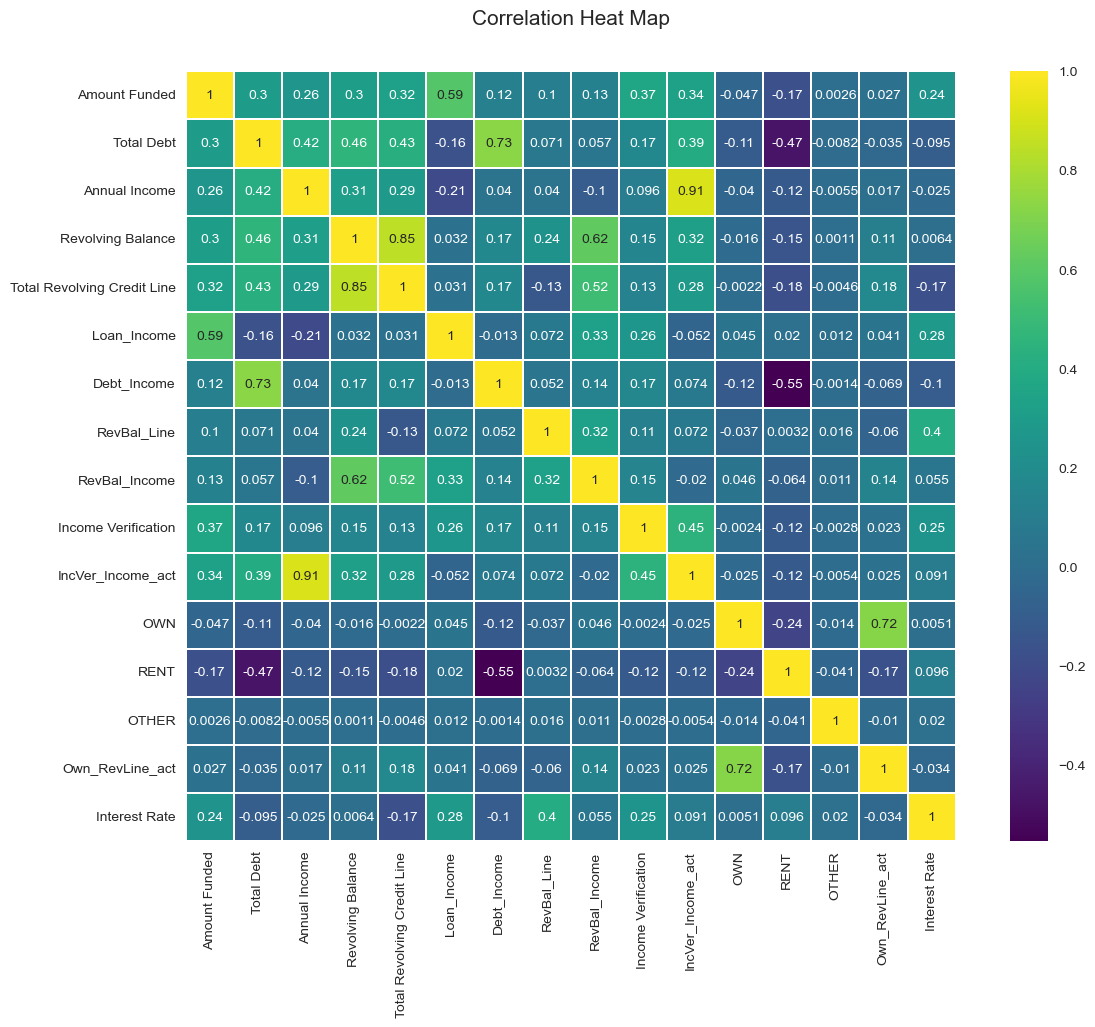

In [59]:
#Code Block 31
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Correlation Heat Map', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

TypeError: Got both 'linewidth' and 'linewidths', which are aliases of one another

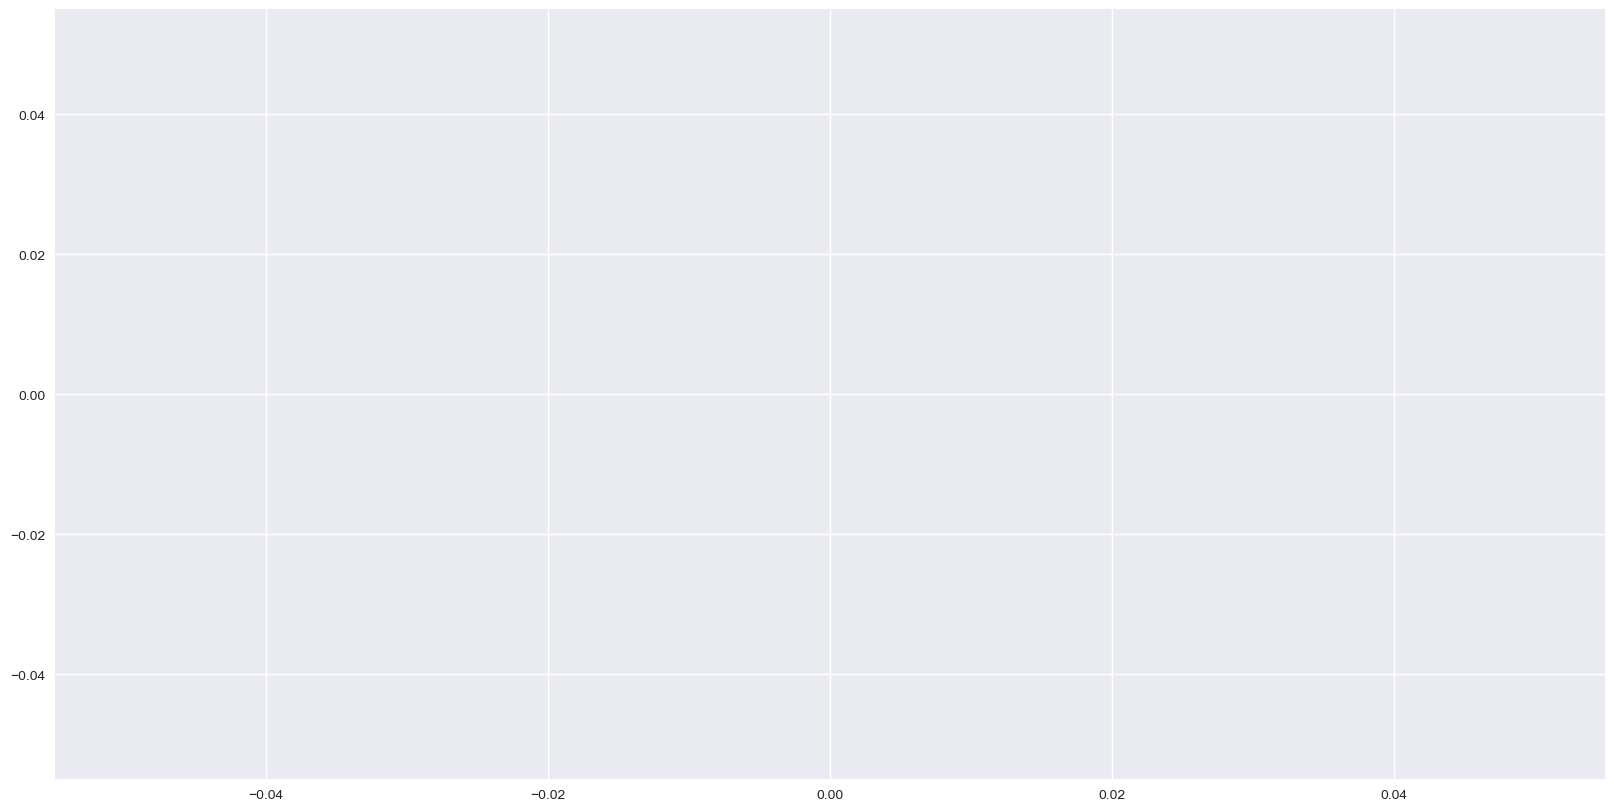

In [60]:
#Code Block 32
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred2', y='Resid2', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})

### Graphically looking at residuals using lowess

- LOWESS (Locally Weighted Scatterplot Smoothing), is a tool used in regression analysis that creates a smooth line through a scatter plot to help you to see relationship between variables and foresee trends.
- https://www.statisticshowto.com/lowess-smoothing/

In [ ]:
#Code Block 33
sns.set(style='dark')
plt.figure(figsize=(20,14))
#top left Amopunt Funded
ax1 = plt.subplot2grid((2, 2), (0, 0))
plt.title('Amount Funded', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax1 = sns.regplot(x='Amount Funded', y='Resid2', lowess=True,
                  data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})
#top right Total Debt
ax2 = plt.subplot2grid((2, 2), (0, 1))
plt.title('Total Debt', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax2 = sns.regplot(x='Total Debt', y='Resid2', lowess=True,
                  data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})
#bottom left Annual Income
ax3 = plt.subplot2grid((2, 2), (1, 0))
plt.title('Annual Income', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax3 = sns.regplot(x='Annual Income', y='Resid2', lowess=True,
                  data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})
#bottom right Loan_Income
ax4 = plt.subplot2grid((2, 2), (1, 1))
plt.title('Total Revolving Credit Line', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax4 = sns.regplot(x= 'Total Revolving Credit Line', y='Resid2', lowess=True,
                  data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})

<h2 style="color:blue;">Remove outliers and re-run regression</h2>


In [ ]:
#Code Block 34
sns.set(style='dark')
plt.figure(figsize=(20,20))


ax1 = plt.subplot2grid((3, 2), (0, 0))
ax1.grid(b=True, which='major')
ax1.grid(b=True, which='minor')
plt.title('Amount Funded', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax1 = sns.regplot(x='Amount Funded', y='Interest Rate',
                  data = df_reg_results, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})


ax2 = plt.subplot2grid((3, 2), (0, 1))
ax2.grid(b=True, which='major')
ax2.grid(b=True, which='minor')
plt.title('Total Debt', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax2 = sns.regplot(x='Total Debt', y='Interest Rate', 
                  data = df_reg_results, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})


ax3 = plt.subplot2grid((3, 2), (1, 0))
ax3.grid(b=True, which='major')
ax3.grid(b=True, which='minor')
plt.title('Annual Income', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax3 = sns.regplot(x='Annual Income', y='Interest Rate', 
                  data = df_reg_results, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})

ax4 = plt.subplot2grid((3, 2), (1, 1))
ax4.grid(b=True, which='major')
ax4.grid(b=True, which='minor')
plt.title('Loan_Income', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax4 = sns.regplot(x='Loan_Income', y='Interest Rate',
                  data = df_reg_results, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})

ax5 = plt.subplot2grid((3, 2), (2, 0))
ax5.grid(b=True, which='major')
ax5.grid(b=True, which='minor')
plt.title('Revolving Balance', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax5 = sns.regplot(x='Revolving Balance', y='Interest Rate', 
                  data = df_reg_results, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})


ax6 = plt.subplot2grid((3, 2), (2, 1))
ax6.grid(b=True, which='major')
ax6.grid(b=True, which='minor')
plt.title('Total Revolving Credit Line', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax6 = sns.regplot(x='Total Revolving Credit Line', y='Interest Rate',
                  data = df_reg_results, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})

In [64]:
#Code Block 35
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      30071 non-null  int64  
 1   Loan ID                        30071 non-null  int64  
 2   Origination Date               30071 non-null  object 
 3   Interest Rate                  30071 non-null  float64
 4   Amount Funded                  30071 non-null  int64  
 5   Total Debt                     30071 non-null  float64
 6   Annual Income                  30071 non-null  int64  
 7   Revolving Balance              30071 non-null  float64
 8   Total Revolving Credit Line    30071 non-null  float64
 9   Term                           30071 non-null  int64  
 10  Grade                          30071 non-null  object 
 11  Employee Title                 28396 non-null  object 
 12  Length of Employment           28990 non-null  floa

In [66]:
#Code Block 36
df_new = df.copy()
df_new = df_new[df_new['Annual Income']<500000]
df_new = df_new[df_new['Total Debt']<1000000]
df_new = df_new[df_new['Revolving Balance']<150000]
df_new = df_new[df_new['Total Revolving Credit Line']<250000]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 6 to 30067
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      29930 non-null  int64  
 1   Loan ID                        29930 non-null  int64  
 2   Origination Date               29930 non-null  object 
 3   Interest Rate                  29930 non-null  float64
 4   Amount Funded                  29930 non-null  int64  
 5   Total Debt                     29930 non-null  float64
 6   Annual Income                  29930 non-null  int64  
 7   Revolving Balance              29930 non-null  float64
 8   Total Revolving Credit Line    29930 non-null  float64
 9   Term                           29930 non-null  int64  
 10  Grade                          29930 non-null  object 
 11  Employee Title                 28266 non-null  object 
 12  Length of Employment           28853 non-null  floa

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

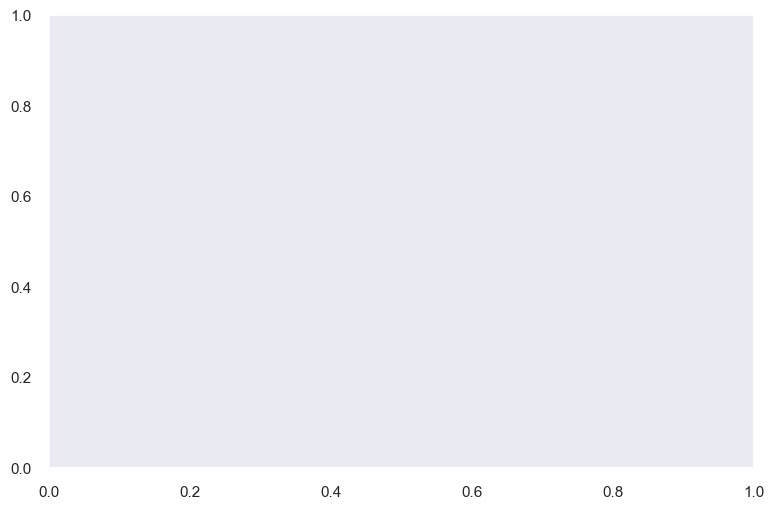

In [68]:
#Code Block 37
sns.set(style='dark')
plt.figure(figsize=(20,20))


ax1 = plt.subplot2grid((3, 2), (0, 0))
ax1.grid(b=True, which='major')
ax1.grid(b=True, which='minor')
plt.title('Amount Funded', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax1 = sns.regplot(x='Amount Funded', y='Interest Rate',
                  data = df_new, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})


ax2 = plt.subplot2grid((3, 2), (0, 1))
ax2.grid(b=True, which='major')
ax2.grid(b=True, which='minor')
plt.title('Total Debt', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax2 = sns.regplot(x='Total Debt', y='Interest Rate', 
                  data = df_new, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})


ax3 = plt.subplot2grid((3, 2), (1, 0))
ax3.grid(b=True, which='major')
ax3.grid(b=True, which='minor')
plt.title('Annual Income', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax3 = sns.regplot(x='Annual Income', y='Interest Rate', 
                  data = df_new, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})

ax4 = plt.subplot2grid((3, 2), (1, 1))
ax4.grid(b=True, which='major')
ax4.grid(b=True, which='minor')
plt.title('Loan_Income', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax4 = sns.regplot(x='Loan_Income', y='Interest Rate',
                  data = df_new, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})

ax5 = plt.subplot2grid((3, 2), (2, 0))
ax5.grid(b=True, which='major')
ax5.grid(b=True, which='minor')
plt.title('Revolving Balance', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax5 = sns.regplot(x='Revolving Balance', y='Interest Rate', 
                  data = df_new, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})


ax6 = plt.subplot2grid((3, 2), (2, 1))
ax6.grid(b=True, which='major')
ax6.grid(b=True, which='minor')
plt.title('Total Revolving Credit Line', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
ax6 = sns.regplot(x='Total Revolving Credit Line', y='Interest Rate',
                  data = df_new, scatter_kws={"alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
                  line_kws={'color': 'black'})

## Run new regression model with filtered dataset - df_new

### Create new regression datasets without outliers

In [70]:
#Code Block 38
df_new.columns

Index(['Member ID', 'Loan ID', 'Origination Date', 'Interest Rate',
       'Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Balance',
       'Total Revolving Credit Line', 'Term', 'Grade', 'Employee Title',
       'Length of Employment', 'Home Ownership', 'Loan Purpose',
       'Zip Code of Residence', 'State of Residence',
       'Delinquencies Past 24 Months', 'Credit Inquires Last 6 Months',
       'Open Accounts', 'TermNum', 'TermString', 'Day', 'Month', 'Year',
       'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
       'Income Verification', 'IncVer_Income_act', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'Own_RevLine_act'],
      dtype='object')

In [72]:
#Code Block 39
df_reg = df_new[['Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Balance', 
                'Total Revolving Credit Line', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
                'Income Verification', 'IncVer_Income_act', 'OWN', 'OTHER', 'RENT','Own_RevLine_act','Interest Rate']]
X = df_reg.drop(["Interest Rate"], axis = 1)
y = df_reg[['Interest Rate']]

In [74]:
#Code Block 40
X = sm.add_constant(X) # adding a constant

reg3 = sm.OLS(y, X).fit()

predictions3 = reg3.predict(X) 
resid3 = reg3.resid
reg3.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [76]:
#Code Block 41

#Create Predictions dataframe
df_predictions3 = pd.DataFrame(predictions3)
df_predictions3 =df_predictions3.rename(columns = {0:'Int_Pred3'})

#Create Residuals dataframe
df_resid3 = pd.DataFrame(resid3)
df_resid3=df_resid3.rename(columns = {0:'Resid3'})


#Concat results into one dataframe
df_reg_results = pd.concat([df_reg, df_predictions3, df_resid3], axis=1)

df_reg_results.head()

NameError: name 'predictions3' is not defined

In [78]:
#Code Block 42
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [80]:
#Code Block 43

corrMatrix = df_reg.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix,3)

,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,OWN,OTHER,RENT,Own_RevLine_act,Interest Rate
Amount Funded,1.000,0.307,0.445,0.411,0.381,0.596,0.113,0.103,0.123,0.365,0.516,-0.047,0.003,-0.173,0.027,0.244
Total Debt,0.307,1.000,0.538,0.390,0.355,-0.158,0.806,0.067,0.017,0.181,0.432,-0.121,-0.008,-0.521,-0.058,-0.105
Annual Income,0.445,0.538,1.000,0.391,0.372,-0.323,0.101,0.048,-0.196,0.151,0.712,-0.083,-0.008,-0.204,-0.009,-0.044
Revolving Balance,0.411,0.390,0.391,1.000,0.763,0.089,0.208,0.332,0.699,0.201,0.364,-0.026,0.004,-0.196,0.105,0.028
Total Revolving Credit Line,0.381,0.355,0.372,0.763,1.000,0.070,0.185,-0.194,0.499,0.144,0.309,-0.004,-0.004,-0.212,0.178,-0.209
Loan_Income,0.596,-0.158,-0.323,0.089,0.070,1.000,-0.012,0.075,0.354,0.267,-0.013,0.046,0.012,0.017,0.054,0.280
Debt_Income,0.113,0.806,0.101,0.208,0.185,-0.012,1.000,0.050,0.124,0.166,0.141,-0.122,-0.001,-0.555,-0.075,-0.100
RevBal_Line,0.103,0.067,0.048,0.332,-0.194,0.075,0.050,1.000,0.335,0.113,0.096,-0.037,0.016,0.005,-0.068,0.404
RevBal_Income,0.123,0.017,-0.196,0.699,0.499,0.354,0.124,0.335,1.000,0.150,-0.028,0.050,0.012,-0.060,0.142,0.066
Income Verification,0.365,0.181,0.151,0.201,0.144,0.267,0.166,0.113,0.150,1.000,0.726,-0.002,-0.003,-0.118,0.022,0.251


<Axes: title={'center': 'Correlation Heat Map'}>

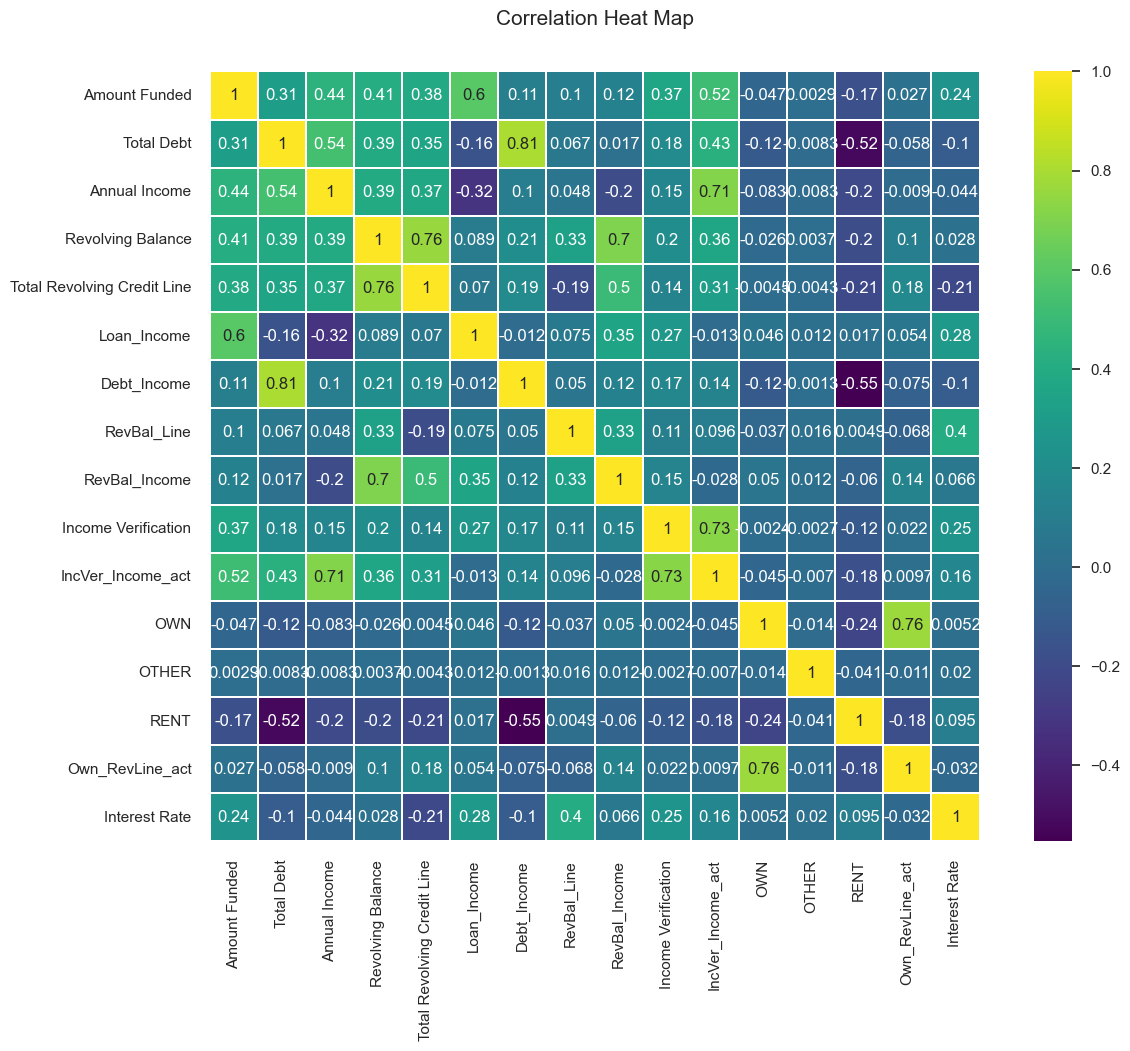

In [82]:
#Code Block 44
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Correlation Heat Map', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [83]:
#Code Block 45
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred3', y='Resid3', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})

KeyError: 'Int_Pred3'

<Figure size 2000x1000 with 0 Axes>